In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df = pd.read_csv("fifa21_train.csv")
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


# Data description and goal
Our goal is to make a predictive model with OVA as a target.


In [3]:
# Cleaning data
# Do we want to change column names? we prefer to watch our dictionary provided by jan if we have doubts
# do we have duplicated? we do not have,the code is below 

In [4]:
duplicates = df[df.duplicated()]
duplicates

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA


In [5]:
# Deal with NaN values.
# Do we want to change lbs to kg and inches to cms?


nan_counts = df.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns


Club                 18
Position            288
Joined               41
Loan Date End     11072
Volleys              41
Curve                41
Agility              41
Balance              41
Jumping              41
Interceptions         7
Positioning           7
Vision               41
Composure           279
Sliding Tackle       41
A/W                  59
D/W                  59
dtype: int64

In [6]:
# We drop Loan Date End columns because has lot of nan values and seems to be irrlevant
df = df.drop("Loan Date End",axis = 1)

In [7]:
#here we drop all the rows that have nan values on the "Volleys" column and the A/W and the D/W
df.dropna(subset = ["Volleys"],inplace = True)
df.dropna(subset = ["A/W"],inplace = True)

In [8]:
nan_aw_rows = df[df['Composure'].isna()]
nan_aw_rows

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
17,5203,M. Oddo B,35,Italy,Lecce,CM,NaN,Lecce 2009 ~ 2012,"6'0""",168lbs,...,71+0,71+0,72+-1,70+1,70+1,70+1,70+1,70+1,14+1,71
369,199090,Ricardo Bueno,27,Brazil,Seongnam FC,ST,ST,Seongnam FC 2015 ~ 2016,"6'1""",181lbs,...,46+0,46+0,48+0,47+0,44+0,44+0,44+0,47+0,18+0,65
396,136138,Diego,30,Brazil,Fenerbahçe SK,CAM,CAM LM,Fenerbahçe SK 2014 ~ 2017,"5'8""",161lbs,...,59+1,59+1,60+1,56+1,48+1,48+1,48+1,56+1,16+1,79
420,107715,Lúcio,35,Brazil,Palmeiras,CB,NaN,Palmeiras 2014 ~ 2015,"6'2""",190lbs,...,70+0,70+0,65+0,69+0,76+0,76+0,76+0,69+0,13+0,76
480,183897,A. Cabral,27,Argentina,Cruzeiro,CM,CM LM,Cruzeiro 2015 ~ 2018,"6'1""",168lbs,...,67+0,67+0,68+0,67+0,63+0,63+0,63+0,67+0,15+0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,210174,Imanol Elías,24,Spain,CD Mirandés,GK,GK,CD Mirandés 2014 ~ 2016,"6'0""",170lbs,...,25+0,25+0,27+0,26+0,25+0,25+0,25+0,26+0,59+0,59
11491,135708,C. Blanco,42,Mexico,Club América,CAM,CAM,Club América 2016 ~ 2016,"5'10""",176lbs,...,56+0,56+0,49+0,45+0,45+0,45+0,45+0,45+0,18+0,71
11509,250,D. Beckham,37,England,NaN,CM,CM RM,England Free,"6'0""",165lbs,...,73+1,73+1,67+1,63+1,59+1,59+1,59+1,63+1,15+1,78
11580,146692,Nenê,32,Brazil,West Ham United,LW,NaN,West Ham United 2015 ~ 2015,"5'11""",154lbs,...,59+0,59+0,55+0,50+0,46+0,46+0,46+0,50+0,13+0,76


In [9]:
#we will replace the club nan values with "Unknown" because they might be not playing anymore or in some process of getting in one club

df["Club"].fillna("Unknow/Retired", inplace = True)

In [10]:
# replacing nan values in position with the value that is in the BP column because it makes sense that his position its his best position
df["Position"].fillna(df["BP"], inplace = True)

In [11]:
# using a lambda function to fill the nan values with the mean of the players of the same best position.

df["Composure"] = df.groupby("BP")["Composure"].transform(lambda x: x.fillna(x.mean()))

#  defining categorical and numerical columns


In [12]:
pd.reset_option("display.max_rows")
df.dtypes

ID              int64
Name           object
Age             int64
Nationality    object
Club           object
                ...  
CB             object
RCB            object
RB             object
GK             object
OVA             int64
Length: 100, dtype: object

In [13]:
# We want to change all the columns of the positions to be numerical and to remove +,- and the number after that, so we will just keep the initial value.
position_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 
                     'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']
for column in position_columns:
    df[column] = df[column].str.extract(r'(\d{2})').astype(float)

In [14]:
#making functions to convert the weight and height columns to more readable and computable values like cms and kilograms

def height_to_cm(height_str):
    #split the numbers to separate feet from inches
    feet, inches = height_str.split("'")
    
    # remove the doble queote and conver to integers
    feet = int(feet)
    inches = int(inches.replace("\"",""))
    
    #conversion
    total_inches = (feet * 12) +inches
    return total_inches * 2.54

df["Height"] = df["Height"].apply(height_to_cm)

In [15]:
#weight function
def weight_to_kg(lbs_str):
    #get rid of lbs and make it integer 
    weight = int(lbs_str.strip("lbs"))
    return round(weight * 0.453592, 2)

df["Weight"] = df["Weight"].apply(weight_to_kg)  

In [16]:
# next on the list are Value,Wage and Release Clause they all have the same format so we should make a function to change them to numerical.
money_columns = ["Value","Wage", "Release Clause"]
def money_in_numbers(value_str):
    # remove the euro symbol €
    value_str = value_str.replace("€","")
    
    #convert K and M to numerical equivalents
    if "K" in value_str:
        return float(value_str.replace("K", "")) *1e3 # if is in the thousand ,replace K with empty space and multiply equivalent
    elif "M" in value_str:
        return float(value_str.replace("M","")) * 1e6 # if is milions ,replace M with empty space and multiply equivalent
    else:
        return float(value_str) #in case its already a number
    
for col in money_columns:
    df[col] = df[col].apply(money_in_numbers)
df["Wage"]

0         4000.0
1        23000.0
2        49000.0
3         4000.0
4         2000.0
          ...   
11695      500.0
11696     3000.0
11697     4000.0
11698     2000.0
11700     2000.0
Name: Wage, Length: 11642, dtype: float64

In [17]:
# next on the list contract,this are not categories that for sure,but still dont look also as numerical.
#still this has a mix of formats
#as a conclusion i would drop it since is not relevant for our target.
df = df.drop("Contract",axis = 1)
# drop here the nan value of gk
df.dropna(subset=['GK'], inplace=True)

In [18]:
# next on list and the last one is Hits which i will just convert to numerical cuz is a number but it seems to have some columns with k at the end,so we should make the conversion
# be carefull each time you run this cell everything get multiplied by 1k
df["Hits"] = df["Hits"].apply(lambda x: float(x.replace("K", "")) * 1e3 if "K" in str(x) else x)
df["Hits"]= df["Hits"].astype(float)
df["Hits"].dtype

dtype('float64')

In [19]:
df= df.drop("Team & Contract",axis = 1)


In [20]:
# choose target and split categorical and numerical. make targets and features
X=df.drop('OVA', axis=1)     
y=df['OVA']
X_num=X.select_dtypes(exclude=["object","category"])

In [21]:
# separate numerical and categorical columns
X=X.drop("ID",axis = 1)
X=X.drop("Name", axis = 1)

X_num=X.select_dtypes(exclude=["object","category"])
X_cat=X.select_dtypes(include=["object","category"])



print (X.shape, X_num.shape, X_cat.shape)  # check shape

(11641, 95) (11641, 84) (11641, 11)


In [22]:
X_cat

,Nationality,Club,BP,Position,foot,Joined,W/F,SM,A/W,D/W,IR
0,Switzerland,FC Lausanne-Sport,CM,CM CDM,Right,"Jul 1, 2015",4 ★,2★,High,Medium,1 ★
1,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,Right,"Jan 16, 2015",3 ★,4★,High,Low,2 ★
2,Italy,Al Hilal,CAM,CAM CF,Right,"Jan 31, 2019",4 ★,4★,High,Medium,2 ★
3,Wales,Swansea City,CDM,CDM CM,Right,"Jul 1, 2016",2 ★,2★,Medium,Medium,1 ★
4,France,US Orléans Loiret Football,CDM,CDM CM,Right,"Jul 1, 2018",2 ★,3★,Low,Medium,1 ★
...,...,...,...,...,...,...,...,...,...,...,...
11695,Peru,Melgar FBC,ST,ST,Right,"Jul 1, 2019",3 ★,3★,High,Low,1 ★
11696,Iceland,Jagiellonia Białystok,LB,LB,Left,"Feb 8, 2018",3 ★,2★,Medium,Medium,1 ★
11697,France,ESTAC Troyes,GK,GK,Right,"Jul 1, 2019",2 ★,1★,Medium,Medium,1 ★
11698,Chile,CD Antofagasta,RM,LM CAM RM,Right,"Jan 23, 2019",3 ★,3★,High,Medium,1 ★


In [23]:
columnas_para_myriam=X_cat[["Nationality","foot","Club","Joined","Position","BP"]]

In [24]:
# check the correlations 
correlations_matrix = X_num.corr()
correlations_matrix > 0.5

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
Age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Height,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Weight,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Growth,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Value,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LCB,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
CB,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
RCB,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
RB,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False


In [25]:
correlations_matrix

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
Age,1.000000,0.093057,0.255377,-0.861718,0.099696,0.203139,0.078812,0.192945,0.159120,0.110664,...,0.228099,0.228099,0.228099,0.159220,0.154911,0.212120,0.212120,0.212120,0.154911,0.150727
Height,0.093057,1.000000,0.767655,-0.053204,-0.002152,0.019469,-0.002412,-0.351222,-0.490698,-0.356606,...,-0.177679,-0.177679,-0.177679,-0.298212,-0.237720,-0.027082,-0.027082,-0.027082,-0.237720,0.348465
Weight,0.255377,0.767655,1.000000,-0.219791,0.035993,0.065521,0.028622,-0.251643,-0.391382,-0.263813,...,-0.112381,-0.112381,-0.112381,-0.230731,-0.181475,0.017780,0.017780,0.017780,-0.181475,0.328230
Growth,-0.861718,-0.053204,-0.219791,1.000000,-0.186385,-0.236722,-0.160353,-0.282449,-0.253248,-0.190287,...,-0.299356,-0.299356,-0.299356,-0.257474,-0.244068,-0.264394,-0.264394,-0.264394,-0.244068,-0.086450
Value,0.099696,-0.002152,0.035993,-0.186385,1.000000,0.819958,0.978733,0.286480,0.249202,0.229465,...,0.271639,0.271639,0.271639,0.269294,0.246304,0.200220,0.200220,0.200220,0.246304,0.045730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LCB,0.212120,-0.027082,0.017780,-0.264394,0.200220,0.215271,0.192250,0.490389,0.496189,0.107210,...,0.959209,0.959209,0.959209,0.909351,0.949769,1.000000,1.000000,1.000000,0.949769,-0.565525
CB,0.212120,-0.027082,0.017780,-0.264394,0.200220,0.215271,0.192250,0.490389,0.496189,0.107210,...,0.959209,0.959209,0.959209,0.909351,0.949769,1.000000,1.000000,1.000000,0.949769,-0.565525
RCB,0.212120,-0.027082,0.017780,-0.264394,0.200220,0.215271,0.192250,0.490389,0.496189,0.107210,...,0.959209,0.959209,0.959209,0.909351,0.949769,1.000000,1.000000,1.000000,0.949769,-0.565525
RB,0.154911,-0.237720,-0.181475,-0.244068,0.246304,0.240907,0.236141,0.646344,0.702550,0.289173,...,0.980950,0.980950,0.980950,0.991501,1.000000,0.949769,0.949769,0.949769,1.000000,-0.667979


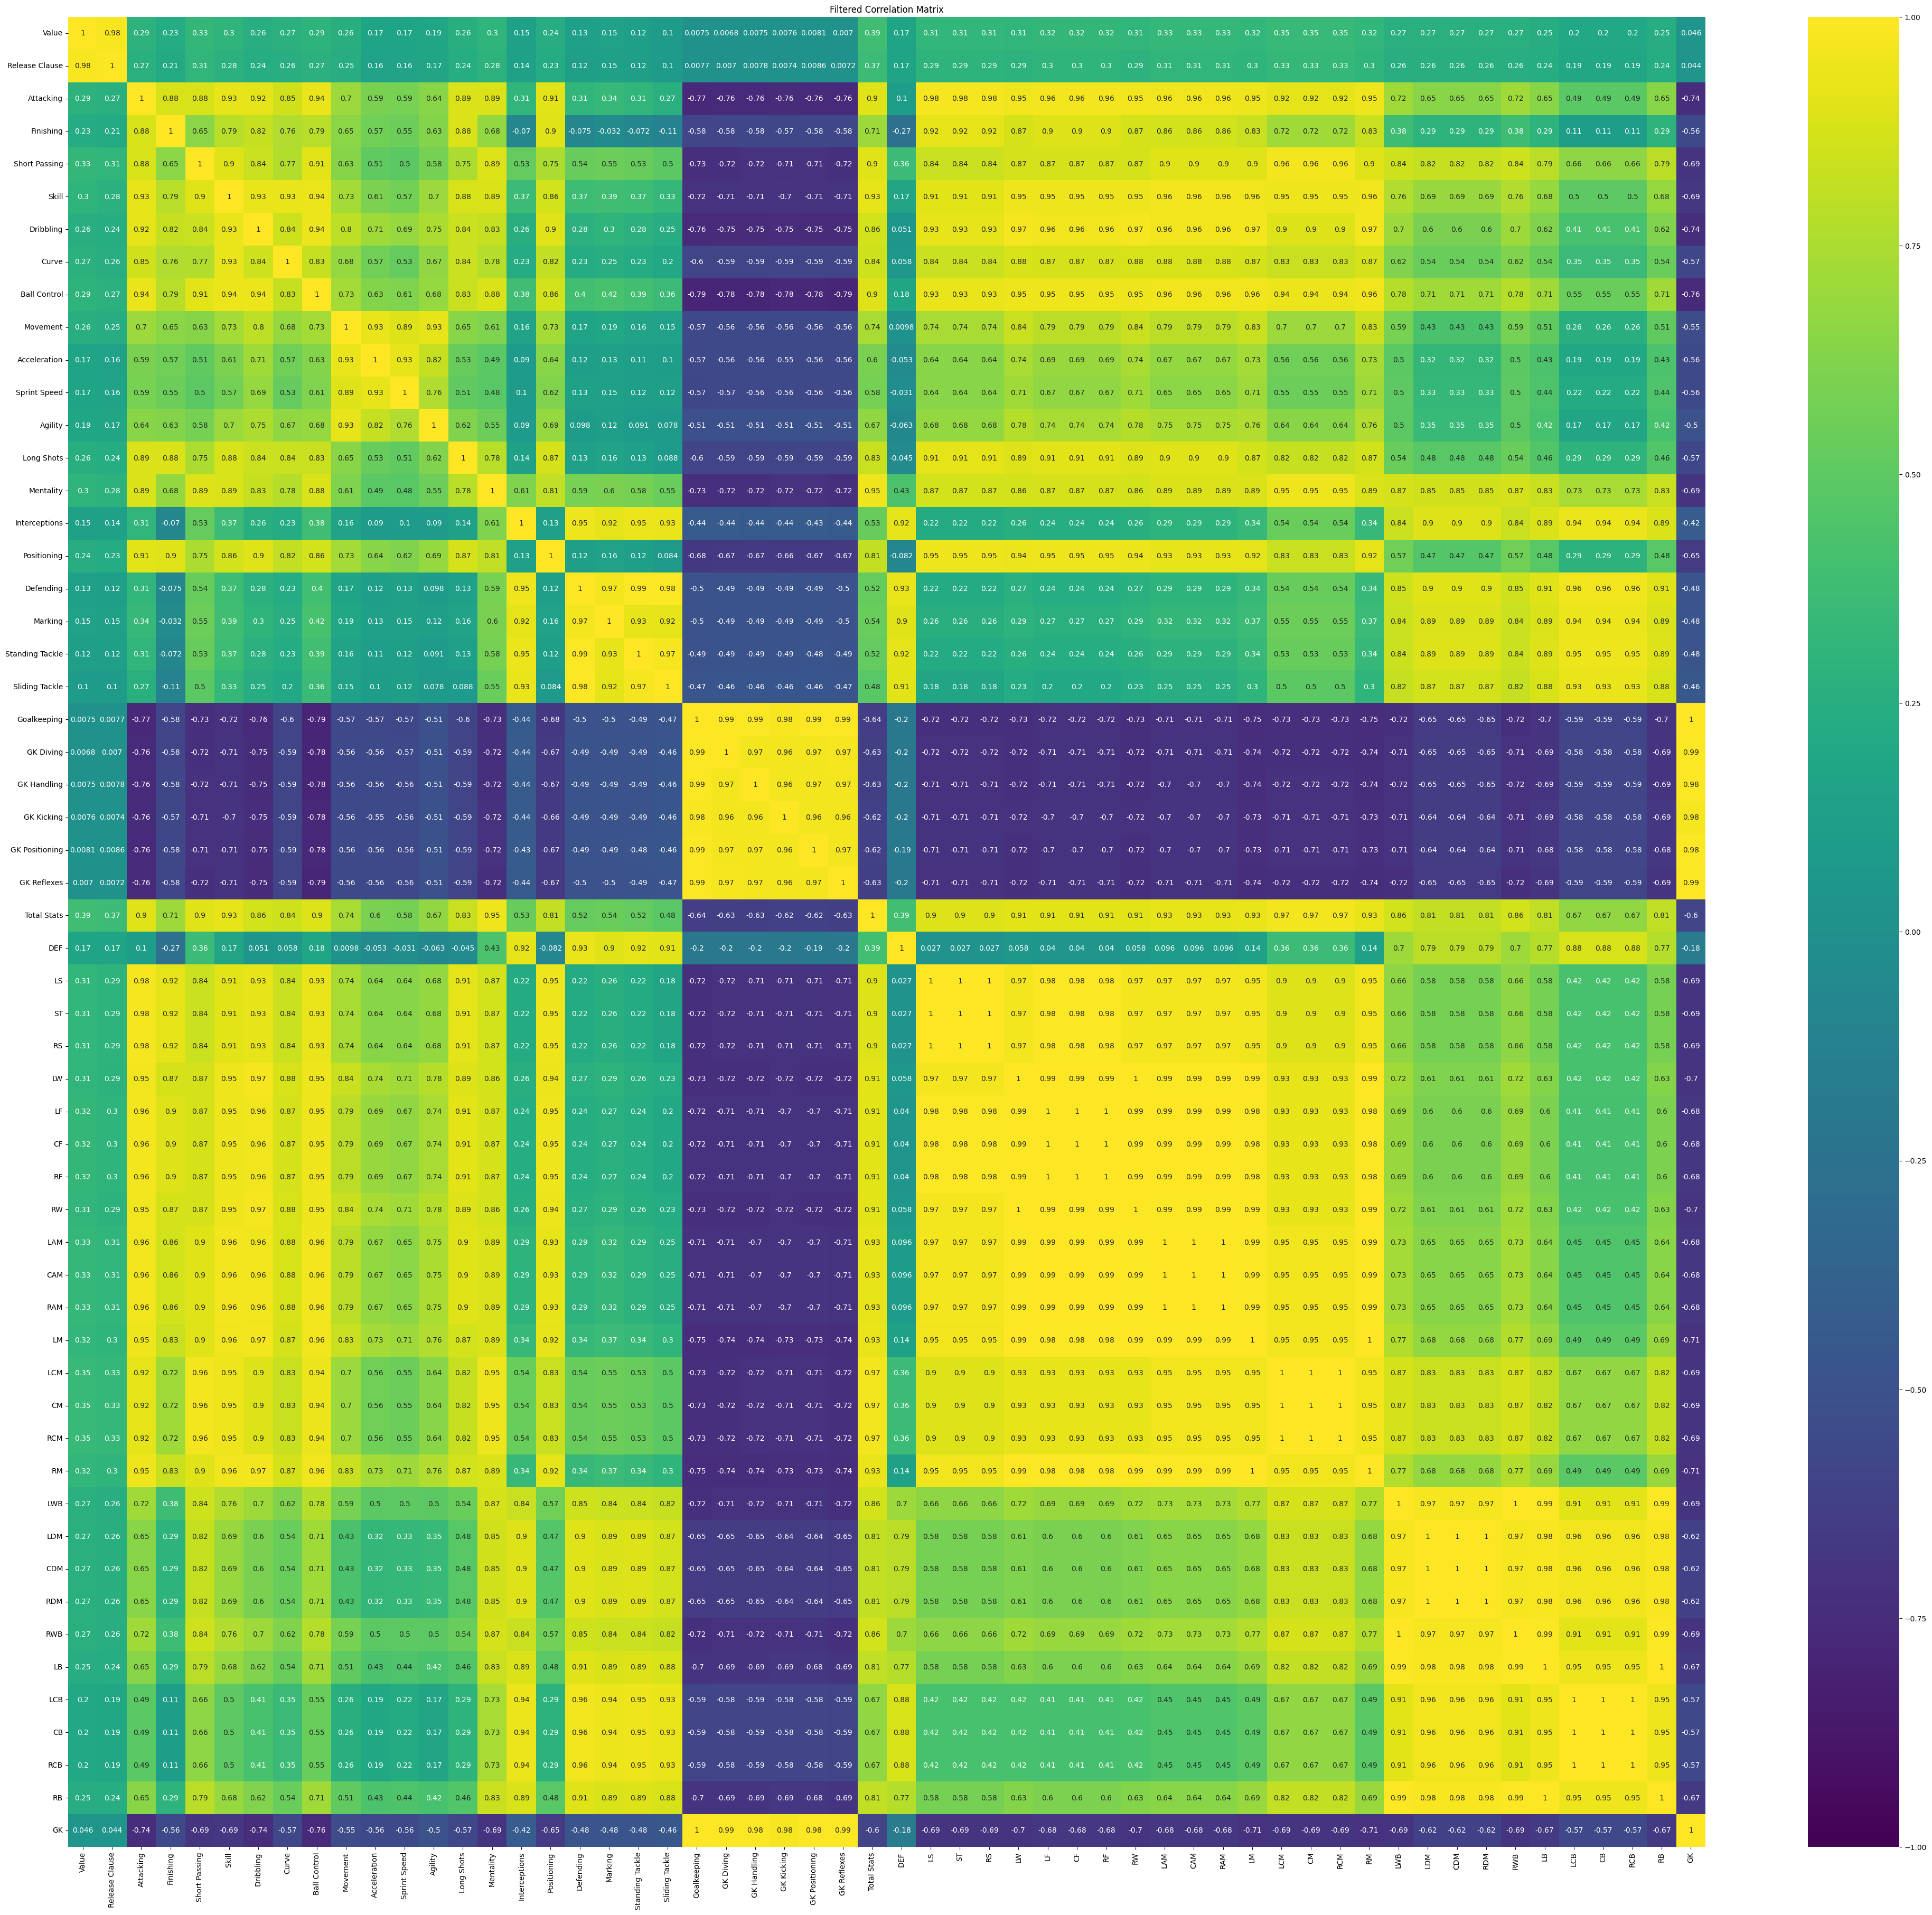

In [26]:
# Set diagonal to NaN
np.fill_diagonal(correlations_matrix.values, np.nan)

# Determine rows where any off-diagonal value is greater than 0.5
mask = correlations_matrix.abs().gt(0.9).any(axis=1)

# Filter the matrix using the mask for rows and columns
filtered_matrix = correlations_matrix[mask].loc[:, mask]

# Restore the diagonal values to 1
np.fill_diagonal(filtered_matrix.values, 1.0)

# Visualize using heatmap
plt.figure(figsize=(50,45))
sns.heatmap(filtered_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Filtered Correlation Matrix")
plt.show()

In [27]:
#filtered_matrix

In [28]:
# dont forget to explain this better

np.fill_diagonal(correlations_matrix.values, np.nan)

# Find pairs where correlation is > 0.8 or < -0.8
high_corr_pairs = []
for i, feature_i in enumerate(correlations_matrix.columns):
    for j, feature_j in enumerate(correlations_matrix.columns):
        if j > i:  # Only look at the upper triangular part to avoid duplicates
            if correlations_matrix.iloc[i, j] == 1 or correlations_matrix.iloc[i, j] == -1:
                high_corr_pairs.append((feature_i, feature_j, correlations_matrix.iloc[i, j]))

# Print the highly correlated feature pairs
for feature_i, feature_j, corr_value in high_corr_pairs:
    print(f"Features: {feature_i} and {feature_j}, Correlation: {corr_value:.2f}")

Features: LS and ST, Correlation: 1.00
Features: LS and RS, Correlation: 1.00
Features: ST and RS, Correlation: 1.00
Features: LW and RW, Correlation: 1.00
Features: LF and CF, Correlation: 1.00
Features: LF and RF, Correlation: 1.00
Features: CF and RF, Correlation: 1.00
Features: LAM and CAM, Correlation: 1.00
Features: LAM and RAM, Correlation: 1.00
Features: CAM and RAM, Correlation: 1.00
Features: LM and RM, Correlation: 1.00
Features: LCM and CM, Correlation: 1.00
Features: LCM and RCM, Correlation: 1.00
Features: CM and RCM, Correlation: 1.00
Features: LWB and RWB, Correlation: 1.00
Features: LDM and CDM, Correlation: 1.00
Features: LDM and RDM, Correlation: 1.00
Features: CDM and RDM, Correlation: 1.00
Features: LB and RB, Correlation: 1.00
Features: LCB and CB, Correlation: 1.00
Features: LCB and RCB, Correlation: 1.00
Features: CB and RCB, Correlation: 1.00


In [29]:
X_num

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,26,175.26,73.03,1,525000.0,4000.0,801000.0,258,54,47,...,59.0,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15.0
1,30,182.88,72.12,0,8500000.0,23000.0,0.0,365,66,79,...,53.0,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18.0
2,33,162.56,60.78,0,9000000.0,49000.0,15300000.0,336,73,76,...,56.0,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12.0
3,22,177.80,68.95,13,275000.0,4000.0,694000.0,242,44,42,...,58.0,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14.0
4,23,180.34,68.04,8,725000.0,2000.0,1400000.0,249,49,37,...,64.0,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,170.18,69.85,0,550000.0,500.0,1200000.0,290,36,72,...,45.0,45.0,45.0,46.0,44.0,43.0,43.0,43.0,44.0,19.0
11696,25,185.42,76.20,5,625000.0,3000.0,891000.0,224,62,24,...,60.0,60.0,60.0,63.0,63.0,61.0,61.0,61.0,63.0,16.0
11697,27,185.42,78.93,4,1600000.0,4000.0,2900000.0,84,12,14,...,26.0,26.0,26.0,25.0,24.0,26.0,26.0,26.0,24.0,69.0
11698,22,167.64,64.86,8,1100000.0,2000.0,1700000.0,286,64,66,...,44.0,44.0,44.0,49.0,45.0,35.0,35.0,35.0,45.0,17.0


In [30]:
# conclusion : There are a lot of features that are HIGHLY correlated (more than 0.95)
# # # Set diagonal to NaN to exclude self-correlation
# np.fill_diagonal(correlations_matrix.values, np.nan)

# # List to store columns to be removed
# cols_to_remove = []

# # Find pairs where correlation is > 0.8 or < -0.8
# for i, feature_i in enumerate(correlations_matrix.columns):
#     for j, feature_j in enumerate(correlations_matrix.columns):
#         if j > i:  # Only look at the upper triangular part to avoid duplicates
#             if correlations_matrix.iloc[i, j] == 1 or correlations_matrix.iloc[i, j] < -0.8:
#                 # Append the second feature (or the first, depending on your preference) to the removal list
#                 if feature_j not in cols_to_remove:
#                     cols_to_remove.append(feature_j)

# # Drop the marked columns
# X_num = X_num.drop(columns=cols_to_remove)


# print(f"Dropped columns: {cols_to_remove}")

In [31]:
X_num.columns

Index(['Age', 'Height', 'Weight', 'Growth', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='obj

In [32]:
# Normalizing data with MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
normalized_df = pd.DataFrame(x_normalized, columns = X_num.columns)
normalized_df 

(11641, 84)


,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.370370,0.40,0.349256,0.038462,0.005833,0.007143,0.004811,0.546835,0.545455,0.478261,...,0.614286,0.614286,0.614286,0.642857,0.637681,0.527778,0.527778,0.527778,0.637681,0.064103
1,0.518519,0.55,0.333333,0.000000,0.094444,0.041071,0.000000,0.817722,0.681818,0.826087,...,0.528571,0.528571,0.528571,0.614286,0.565217,0.444444,0.444444,0.444444,0.565217,0.102564
2,0.629630,0.15,0.134908,0.000000,0.100000,0.087500,0.091892,0.744304,0.761364,0.793478,...,0.571429,0.571429,0.571429,0.642857,0.565217,0.347222,0.347222,0.347222,0.565217,0.025641
3,0.222222,0.45,0.277865,0.500000,0.003056,0.007143,0.004168,0.506329,0.431818,0.423913,...,0.600000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.583333,0.623188,0.051282
4,0.259259,0.50,0.261942,0.307692,0.008056,0.003571,0.008408,0.524051,0.488636,0.369565,...,0.685714,0.685714,0.685714,0.714286,0.710145,0.625000,0.625000,0.625000,0.710145,0.064103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,0.481481,0.30,0.293613,0.000000,0.006111,0.000893,0.007207,0.627848,0.340909,0.750000,...,0.414286,0.414286,0.414286,0.457143,0.434783,0.375000,0.375000,0.375000,0.434783,0.115385
11637,0.333333,0.60,0.404724,0.192308,0.006944,0.005357,0.005351,0.460759,0.636364,0.228261,...,0.628571,0.628571,0.628571,0.700000,0.710145,0.625000,0.625000,0.625000,0.710145,0.076923
11638,0.407407,0.60,0.452493,0.153846,0.017778,0.007143,0.017417,0.106329,0.068182,0.119565,...,0.142857,0.142857,0.142857,0.157143,0.144928,0.138889,0.138889,0.138889,0.144928,0.756410
11639,0.222222,0.25,0.206299,0.307692,0.012222,0.003571,0.010210,0.617722,0.659091,0.684783,...,0.400000,0.400000,0.400000,0.500000,0.449275,0.263889,0.263889,0.263889,0.449275,0.089744


In [33]:
# OneHotEncoding
X_cat.columns


Index(['Nationality', 'Club', 'BP', 'Position', 'foot', 'Joined', 'W/F', 'SM',
       'A/W', 'D/W', 'IR'],
      dtype='object')

In [34]:
#spliting nominal and ordinal data
nominal_columns = ["BP"]
ordinal_columns = ["W/F","SM","A/W","D/W","IR"]

df_nominal = X_cat[nominal_columns]
df_ordinal = X_cat[ordinal_columns]

In [35]:
#normalizing categorical variables
#fit and transform the nominal data
encoder = OneHotEncoder(drop="first").fit(df_nominal)  # no hay que volver a crearlo

encoded = encoder.transform(df_nominal).toarray()
print(encoded)
encoded_nominal_df=pd.DataFrame(encoded, columns = encoder.get_feature_names_out(nominal_columns))
encoded_nominal_df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11637,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11638,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
#encode ordinal data
#we should make sure that we have the order that we want
wf_mapping = ['1 ★', '2 ★', '3 ★', '4 ★', '5 ★']
sm_mapping = ['1★', '2★', '3★', '4★', '5★'] 
ir_mapping = ['1 ★', '2 ★', '3 ★', '4 ★', '5 ★']
aw_mapping = ['Low', 'Medium', 'High']
dw_mapping = ['Low', 'Medium', 'High']

# Combine the mappings into a list
mappings = [wf_mapping, sm_mapping, aw_mapping, dw_mapping, ir_mapping]

# Create the encoder
encoder = OrdinalEncoder(categories=mappings)

# Fit and transform the data
df_ordinal_encoded = encoder.fit_transform(df[['W/F', 'SM', 'A/W', 'D/W', 'IR']])

# Convert the result back to a DataFrame
df_ordinal_encoded = pd.DataFrame(df_ordinal_encoded, columns=['W/F', 'SM', 'A/W', 'D/W', 'IR'])


In [37]:
df_ordinal_encoded

,W/F,SM,A/W,D/W,IR
0,3.0,1.0,2.0,1.0,0.0
1,2.0,3.0,2.0,0.0,1.0
2,3.0,3.0,2.0,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0
4,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...
11636,2.0,2.0,2.0,0.0,0.0
11637,2.0,1.0,1.0,1.0,0.0
11638,1.0,0.0,1.0,1.0,0.0
11639,2.0,2.0,2.0,1.0,0.0


In [38]:
X = pd.concat([df_ordinal_encoded,encoded_nominal_df,normalized_df], axis=1)
X

,W/F,SM,A/W,D/W,IR,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.614286,0.614286,0.614286,0.642857,0.637681,0.527778,0.527778,0.527778,0.637681,0.064103
1,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.528571,0.528571,0.528571,0.614286,0.565217,0.444444,0.444444,0.444444,0.565217,0.102564
2,3.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.571429,0.571429,0.571429,0.642857,0.565217,0.347222,0.347222,0.347222,0.565217,0.025641
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.600000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.583333,0.623188,0.051282
4,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.685714,0.685714,0.685714,0.714286,0.710145,0.625000,0.625000,0.625000,0.710145,0.064103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414286,0.414286,0.414286,0.457143,0.434783,0.375000,0.375000,0.375000,0.434783,0.115385
11637,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.628571,0.628571,0.628571,0.700000,0.710145,0.625000,0.625000,0.625000,0.710145,0.076923
11638,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.142857,0.142857,0.142857,0.157143,0.144928,0.138889,0.138889,0.138889,0.144928,0.756410
11639,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.400000,0.400000,0.500000,0.449275,0.263889,0.263889,0.263889,0.449275,0.089744


In [39]:
encoded_nominal_df.columns

Index(['BP_CB', 'BP_CDM', 'BP_CF', 'BP_CM', 'BP_GK', 'BP_LB', 'BP_LM', 'BP_LW',
       'BP_LWB', 'BP_RB', 'BP_RM', 'BP_RW', 'BP_RWB', 'BP_ST'],
      dtype='object')

# Apply the model


In [40]:
y

0        64
1        77
2        80
3        59
4        65
         ..
11695    65
11696    65
11697    70
11698    67
11700    64
Name: OVA, Length: 11641, dtype: int64

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9312, 103)
(2329, 103)
(9312,)
(2329,)


In [43]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
#looks like i still have a nan value in GK (solved in the code above)
#X["GK"]

In [45]:
predictions_test = lm.predict(X_test) # start here for the new data 
predictions_test[:5]


array([73.20294189, 71.87786484, 71.49127197, 61.28295135, 75.29470444])

In [46]:
y_test[:5]

11624    74
1342     70
1059     72
1388     61
8084     76
Name: OVA, dtype: int64

# Model Validation
### Description
* R2.
* MSE.
* RMSE.
* MAE.

In [47]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9210622516345262

In [48]:
#predictions with the test portion of the data 
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9172796712760969

In [49]:
def evaluate_regression(y_test, predictions_test):
    mse = mean_squared_error(y_test, predictions_test)
    rmse = mean_squared_error(y_test, predictions_test, squared=False)
    mae = mean_absolute_error(y_test, predictions_test)
    r2 = r2_score(y_test, predictions_test)
    
    return mse, rmse, mae, r2

In [50]:
mse, rmse, mae, r2 = evaluate_regression(y_test, predictions_test)
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

MSE: 3.8671113668993744, RMSE: 1.9664972328735615, MAE: 1.5237014167756162, R2: 0.9172796712760969


# first conclusion. 
Without twisting too much the code i get a 0.964 r2 data of the train data and horrible r2 with the test data.

In [51]:
#for some reason my pc can compute this code but not vif ,not as expensive computationaly i gues,so i do this before vif to get 
#rid of the infinite correlations first
corr_matrix = X.corr().abs()
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
correlation_values = corr_matrix.where(upper_triangle)
perfect_correlations = [(row, col) for row in correlation_values.index for col in correlation_values.columns if correlation_values.loc[row, col] == 1.0]
print(perfect_correlations)

[('LS', 'ST'), ('LS', 'RS'), ('ST', 'RS'), ('LW', 'RW'), ('LF', 'CF'), ('LF', 'RF'), ('CF', 'RF'), ('LAM', 'CAM'), ('LAM', 'RAM'), ('CAM', 'RAM'), ('LM', 'RM'), ('LCM', 'CM'), ('LCM', 'RCM'), ('CM', 'RCM'), ('LWB', 'RWB'), ('LDM', 'CDM'), ('LDM', 'RDM'), ('CDM', 'RDM'), ('LB', 'RB'), ('LCB', 'CB'), ('LCB', 'RCB'), ('CB', 'RCB')]


In [52]:
# List of columns to drop
columns_to_drop = ['ST', 'RS', 'RW', 'CF', 'RF', 'CAM', 'RAM', 'RM', 'CM', 'RCM', 'RWB', 'CDM', 'RDM', 'RB', 'CB', 'RCB']

# Drop the columns
X = X.drop(columns=columns_to_drop)

In [53]:
# tried to get the vif stats but got a timeout error because one of them might be infinite.

In [54]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_sample = X.sample(frac=1, random_state=42)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"]= [variance_inflation_factor(X_sample.values, i) for i in range(X.shape[1])]
vif_data
columns_to_drop = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [55]:
# if i run this line of code and then rerun the linear regresion creating model i get this values 
# MSE: 14.182166873147885, RMSE: 3.765921782664622, MAE: 2.9006248472129017, R2: 0.6977976828125334
# those values are worse but maybe the other ones are too good?
#X = X.drop(columns=columns_to_drop)

In [56]:
# try with lasso
from sklearn.linear_model import Lasso

# Create the model
lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength. Larger values mean stronger regularization.

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict
predictions = lasso_model.predict(X_test)

mse, rmse, mae, r2 = evaluate_regression(y_test, predictions_test)
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

#still no changes ,lasso is supoused to solve multicollinearity problems ,but the problem is so big that it just cant handle it

MSE: 3.8671113668993744, RMSE: 1.9664972328735615, MAE: 1.5237014167756162, R2: 0.9172796712760969


# big discovery
+ If i get rid of my nominal columns it works
+ if i keep that df and try without one of the values and do that will all the list the problem persist
+ but if i let only one of them and do that with all the columns i find one winner called "Position",with "foot" also works and with "bp",so the problem are the others which are nationality,club,joined
+ so if i let only one of the winners,it works ,but if there are more than one at once it doesnt.

# Conclusion
After doing the cleaning ,normalizing and onehot encoding the results were horrible,i had overfitting all over the place,after trying ,lasso regresion, vif (which didnt worked cuz of infinite multicollinearity), and removing correlated columns still had the problem.
In the big discovery i pretty much find out that i have to left only bp ,position or foot in the nominal categories.
Why?Good question,i think that when i onehot encode it ,the multicollinearity goes to heaven exponentially.

I also have code that gets rid of all the features with more than 10 vif,but that gives a worse output but maybe more realistic.

In [57]:
df_validate = pd.read_csv("fifa21_validate.csv")
df_validate

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [58]:
# cleaning the data
nan_counts = df_validate.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns

Club                 3
Position            55
Joined               3
Loan Date End     1889
Volleys              3
Curve                3
Agility              3
Balance              3
Jumping              3
Vision               3
Composure           50
Sliding Tackle       3
A/W                  8
D/W                  8
dtype: int64

In [59]:
df_validate

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [60]:
df_validate=df_validate.drop(["Loan Date End","Contract","Team & Contract","ID","Name","Position","foot","Joined","Nationality","Club"],axis = 1)

In [61]:
df_validate["Hits"] = df_validate["Hits"].apply(lambda x: float(x.replace("K", "")) * 1e3 if "K" in str(x) else x)
df_validate["Hits"]= df_validate["Hits"].astype(float)
df_validate["Hits"].dtype

dtype('float64')

In [62]:
#here we drop all the rows that have nan values on the "Volleys" column and the A/W and the D/W
df_validate.dropna(subset = ["Volleys"],inplace = True)
df_validate.dropna(subset = ["A/W"],inplace = True)

In [63]:
df_validate["Composure"] = df_validate.groupby("BP")["Composure"].transform(lambda x: x.fillna(x.mean()))

#  defining categorical and numerical columns

In [64]:
# We want to change all the columns of the positions to be numerical and to remove +,- and the number after that, so we will just keep the initial value.
position_columns_validate = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 
                     'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']
for column in position_columns_validate:
    df_validate[column] = df_validate[column].str.extract(r'(\d{2})').astype(float)

In [65]:
df_validate["Height"] = df_validate["Height"].apply(height_to_cm)

In [66]:
df_validate["Weight"] = df_validate["Weight"].apply(weight_to_kg)  

In [67]:
for col in money_columns:
    df_validate[col] = df_validate[col].apply(money_in_numbers)


In [68]:
df_validate.dropna(subset=['GK'], inplace=True)

In [69]:
X_validate=df_validate.drop('OVA', axis=1)     
y_validate=df_validate['OVA']
#X_num_validate=X_validate.select_dtypes(exclude=["object","category"])


In [70]:
# separate numerical and categorical columns
X_num_validate=X_validate.select_dtypes(exclude=["object","category"])
X_cat_validate=X_validate.select_dtypes(include=["object","category"])

print (X_validate.shape, X_num_validate.shape, X_cat_validate.shape, y_validate.shape)  # check shape

(1989, 90) (1989, 84) (1989, 6) (1989,)


In [71]:
# Normalizing data with MinMaxScaler
x_normalized_validate = transformer.transform(X_num_validate)
print(x_normalized_validate.shape)
normalized_df_validate = pd.DataFrame(x_normalized_validate, columns = X_num_validate.columns)
normalized_df_validate 

(1989, 84)


,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.259259,0.65,0.611199,0.269231,0.010833,0.008929,0.000000,0.475949,0.465909,0.195652,...,0.642857,0.642857,0.642857,0.642857,0.681159,0.708333,0.708333,0.708333,0.681159,0.076923
1,0.222222,0.35,0.293613,0.192308,0.013333,0.005357,0.013213,0.648101,0.636364,0.619565,...,0.442857,0.442857,0.442857,0.500000,0.449275,0.305556,0.305556,0.305556,0.449275,0.089744
2,0.111111,0.65,0.468241,0.653846,0.001333,0.000893,0.001495,0.015190,0.011364,0.021739,...,0.028571,0.028571,0.028571,0.028571,0.028986,0.027778,0.027778,0.027778,0.028986,0.551282
3,0.000000,0.70,0.420647,0.884615,0.001778,0.000893,0.002787,0.437975,0.363636,0.304348,...,0.542857,0.542857,0.542857,0.557143,0.565217,0.527778,0.527778,0.527778,0.565217,0.012821
4,0.296296,0.65,0.420647,0.192308,0.025556,0.023214,0.025826,0.640506,0.579545,0.608696,...,0.800000,0.800000,0.800000,0.800000,0.797101,0.722222,0.722222,0.722222,0.797101,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.185185,0.35,0.206299,0.423077,0.003611,0.001786,0.004390,0.392405,0.602273,0.217391,...,0.514286,0.514286,0.514286,0.628571,0.637681,0.527778,0.527778,0.527778,0.637681,0.064103
1985,0.185185,0.80,0.468241,0.346154,0.002111,0.001250,0.001712,0.088608,0.079545,0.065217,...,0.100000,0.100000,0.100000,0.085714,0.086957,0.083333,0.083333,0.083333,0.086957,0.615385
1986,0.407407,0.30,0.230096,0.000000,0.088889,0.016071,0.072072,0.734177,0.795455,0.750000,...,0.628571,0.628571,0.628571,0.685714,0.623188,0.430556,0.430556,0.430556,0.623188,0.102564
1987,0.666667,0.50,0.468241,0.000000,0.001556,0.007143,0.001471,0.572152,0.590909,0.445652,...,0.657143,0.657143,0.657143,0.657143,0.666667,0.652778,0.652778,0.652778,0.666667,0.051282


In [72]:
# one hot encoding
#spliting nominal and ordinal data
nominal_columns_validate = ["BP"]
ordinal_columns_validate = ["W/F","SM","A/W","D/W","IR"]

df_nominal_validate = X_cat_validate[nominal_columns_validate]
df_ordinal_validate = X_cat_validate[ordinal_columns_validate]

In [73]:
encoder_validate = OneHotEncoder(drop="first").fit(df_nominal)  
encoded_validate = encoder_validate.transform(df_nominal_validate).toarray()
print(encoded_validate)
encoded_nominal_df_validate=pd.DataFrame(encoded_validate, columns = encoder_validate.get_feature_names_out(nominal_columns_validate))
encoded_nominal_df_validate

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#encode ordinal data
#we should make sure that we have the order that we want
wf_mapping_validate = ['1 ★', '2 ★', '3 ★', '4 ★', '5 ★']
sm_mapping_validate = ['1★', '2★', '3★', '4★', '5★'] 
ir_mapping_validate = ['1 ★', '2 ★', '3 ★', '4 ★', '5 ★']
aw_mapping_validate = ['Low', 'Medium', 'High']
dw_mapping_validate = ['Low', 'Medium', 'High']

# Combine the mappings into a list
mappings_validate = [wf_mapping_validate, sm_mapping_validate, aw_mapping_validate, dw_mapping_validate, ir_mapping_validate]

# Create the encoder
encoder_validate = OrdinalEncoder(categories=mappings_validate)

# Fit and transform the data
df_ordinal_encoded_validate = encoder_validate.fit_transform(df_validate[['W/F', 'SM', 'A/W', 'D/W', 'IR']])

# Convert the result back to a DataFrame
df_ordinal_encoded_validate = pd.DataFrame(df_ordinal_encoded_validate, columns=['W/F', 'SM', 'A/W', 'D/W', 'IR'])


In [75]:
X_validate = pd.concat([df_ordinal_encoded_validate,encoded_nominal_df_validate,normalized_df_validate], axis=1)
X_validate

,W/F,SM,A/W,D/W,IR,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.642857,0.642857,0.642857,0.642857,0.681159,0.708333,0.708333,0.708333,0.681159,0.076923
1,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.442857,0.442857,0.442857,0.500000,0.449275,0.305556,0.305556,0.305556,0.449275,0.089744
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.028571,0.028571,0.028571,0.028571,0.028986,0.027778,0.027778,0.027778,0.028986,0.551282
3,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.542857,0.542857,0.542857,0.557143,0.565217,0.527778,0.527778,0.527778,0.565217,0.012821
4,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.800000,0.800000,0.800000,0.800000,0.797101,0.722222,0.722222,0.722222,0.797101,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514286,0.514286,0.514286,0.628571,0.637681,0.527778,0.527778,0.527778,0.637681,0.064103
1985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.100000,0.100000,0.100000,0.085714,0.086957,0.083333,0.083333,0.083333,0.086957,0.615385
1986,3.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.628571,0.628571,0.628571,0.685714,0.623188,0.430556,0.430556,0.430556,0.623188,0.102564
1987,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.657143,0.657143,0.657143,0.657143,0.666667,0.652778,0.652778,0.652778,0.666667,0.051282


# Apply the model 

In [76]:
results_for_validate = lm.predict(X_validate)
comparision= pd.concat([df_validate,pd.Series(results_for_validate, name='estimate')],axis=1).head()
comparision

,Age,BP,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,estimate
0,23.0,CB,187.96,88.00,7.0,975000.0,5000.0,0.0,230.0,47.0,...,61.0,59.0,61.0,67.0,67.0,67.0,61.0,16.0,67.0,65.170197
1,22.0,CAM,172.72,69.85,5.0,1200000.0,3000.0,2200000.0,298.0,62.0,...,47.0,49.0,45.0,38.0,38.0,38.0,45.0,17.0,68.0,65.952770
2,19.0,GK,187.96,79.83,17.0,120000.0,500.0,249000.0,48.0,7.0,...,18.0,16.0,16.0,18.0,18.0,18.0,16.0,53.0,54.0,53.532547
3,16.0,CDM,190.50,77.11,23.0,160000.0,500.0,464000.0,215.0,38.0,...,54.0,53.0,53.0,54.0,54.0,54.0,53.0,11.0,55.0,56.506054
4,24.0,CDM,187.96,77.11,5.0,2300000.0,13000.0,4300000.0,295.0,57.0,...,72.0,70.0,69.0,68.0,68.0,68.0,69.0,18.0,70.0,69.494164


In [77]:
results_for_validate

array([65.17019653, 65.95277023, 53.532547  , ..., 74.17806244,
       64.11697769, 60.98077393])

In [78]:
 mse, rmse, mae, r2 = evaluate_regression(y_validate, results_for_validate)
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

MSE: 3.783757914938769, RMSE: 1.9451884008853149, MAE: 1.500318090900097, R2: 0.9171239025372632


In [79]:
r2_score(y_validate, results_for_validate)

0.9171239025372632

In [80]:
results_for_validate.shape

(1989,)